In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

# MLE and MAP

1. Define a test problem in the following way:
    - ...
    - ...

In [59]:
#Degree of polynomial
k = (int) (input("Choose a positive integer k: "))

#Define the true solution
theta_true = np.ones((k, )) 

#Input dataset

a = (int) (input("Choose an interval [a, b] --a: "))
b = (int) (input("Choose an interval [a, b] --b: "))
N = 100 #number of datapoints
X = np.linspace(a, b, N)


In [60]:
#Generalized Vandermonde Matrix
def vander(X, k):
    N = len(X)

    #Initialization
    phi = np.zeros((N,k))

    for i in range(k):
        phi[:,i] = X**i 

    return phi

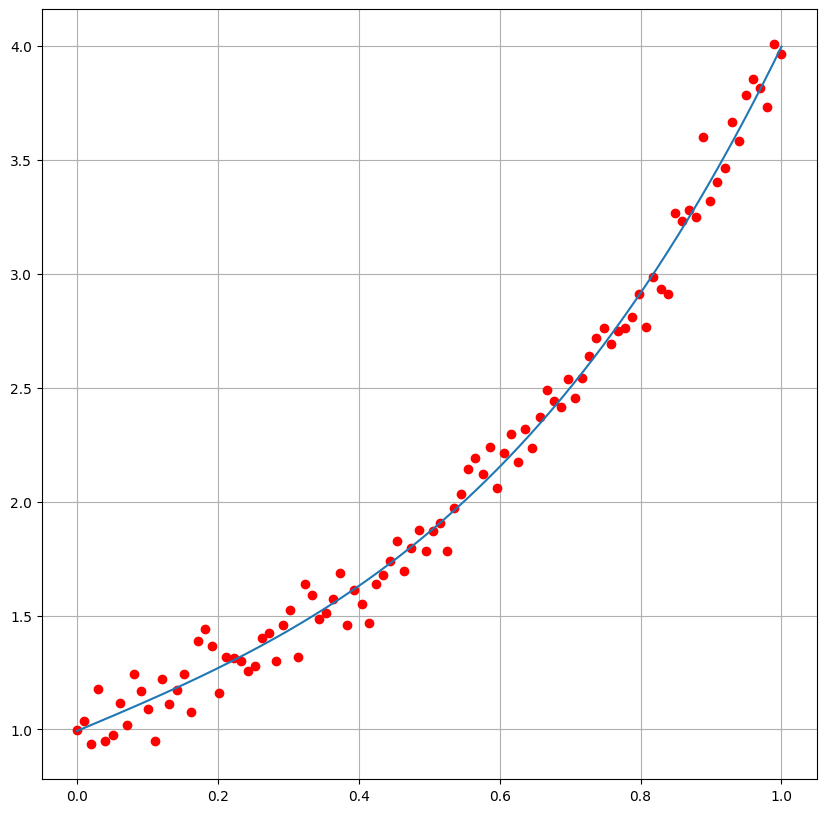

In [61]:
sigma = (float) (input("Choose the variance of the noise: "))

Phi = vander(X, k)
Y = Phi @ theta_true
gaussian_noise = np.random.normal(0, 1, Y.shape)
Y = Y + sigma * gaussian_noise #Noisy Y


2. Built a dataset D = {(X, Y)} sucht that..

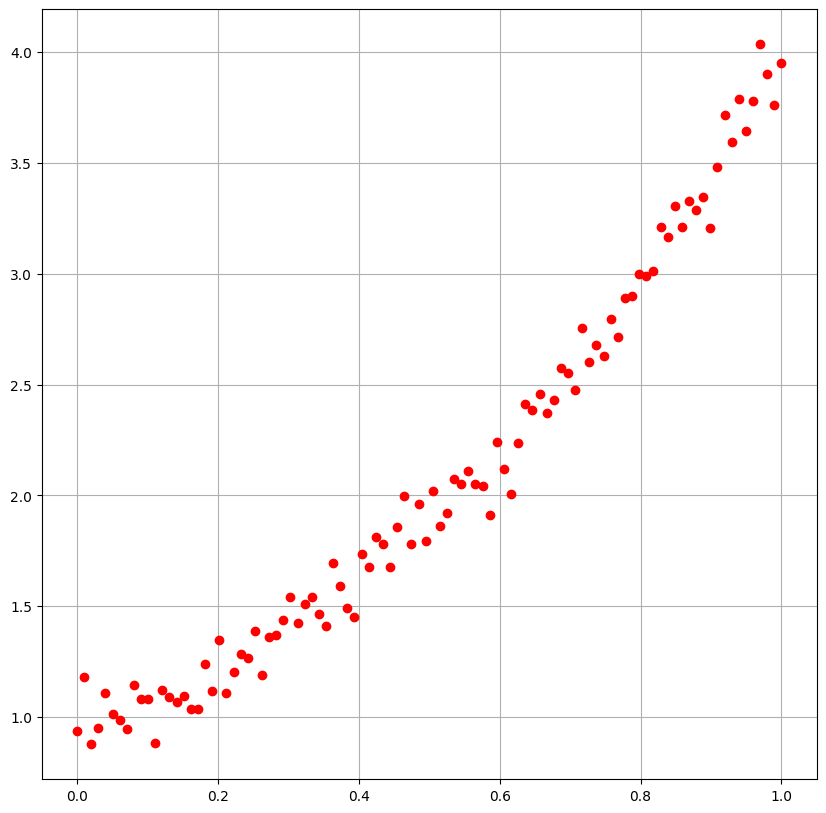

In [53]:
D = (X, Y)

3. Pretend not to know the correct value of k...
    - Write a function that takes as input the training data D = (X,Y) ...
    - Write a function that takes as input a set of K-dimensional parameter vector ..
    - For different values of K, plot the training datapoints and the test datapoints with different colors,...

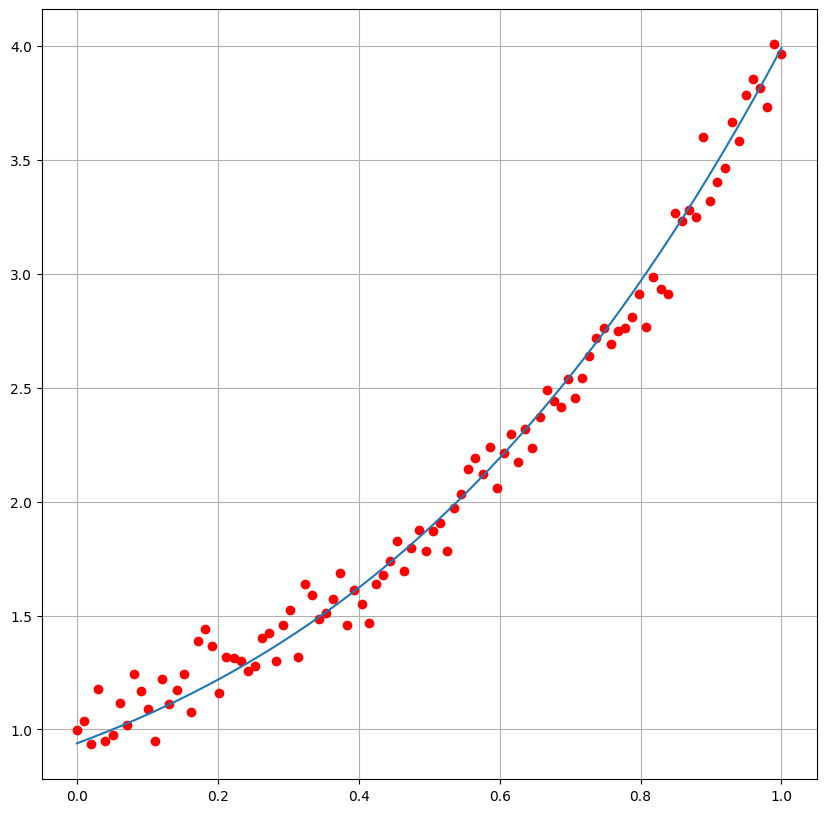

In [62]:
def MLE(D, k_trial):
    X = D[0]
    Y = D[1]

    Phi_trial = vander(X, k_trial)

    # A = Phi_trial.T @ Phi_trial
    # b = Phi_trial.T @ Y
    # L = scipy.linalg.cholesky(A)

    # y = scipy.linalg.solve_triangular(L, b)
    # x = scipy.linalg.solve_triangular(L.T, b)

    #theta_mle =  x

    theta_mle = np.linalg.solve(Phi_trial.T @ Phi_trial, Phi_trial.T @ Y)

    return theta_mle

theta_mle = MLE(D, k_trial=k)


In [14]:
def regression_model(X, theta):
    Phi = vander(X)
    return Phi.T @ theta

def average_absolute_error(D_test, theta):
    X_test = D_test[0]
    Y_test = D_test[1]
    N_test = X_test.shape[0]

    return ((np.linalg.norm(X_test, theta)-Y_test)**2)/N_test


In [69]:
#Create the test problem
def test(N, k_test, c, d):
    
    theta = np.random.uniform(c, d, k_test) 
    X_test = np.linspace(c, d, k_test)
    Phi_test = vander(X_test, k_test)
    Y_test = Phi_test @ theta
    gaussian_noise_test = np.random.normal(0, 1, Y_test.shape)
    Y_test = Y_test + sigma * gaussian_noise_test #Noisy Y

    D_test = (X_test, Y_test)

    return D_test

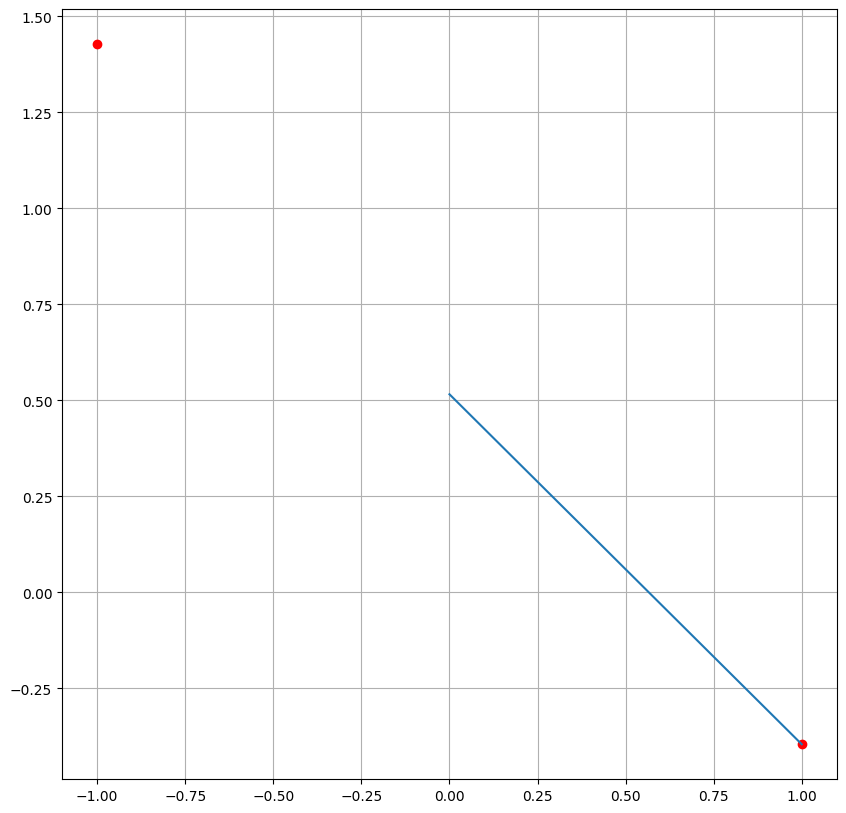

In [72]:
k_trial = 2
D_train = D
D_test = test(100, k_trial, -1, 1)

theta_mle_train = MLE(D, k_trial = 4)

theta_mle_test = MLE (D_test, k_trial)


XX_trial = np.linspace(a, b, 1000)    #another input vector with more point so a more resoluted space (we want the result plot to be smoothed)
YY_trial = vander(XX_trial, k_trial) @ theta_mle_test

plt.figure(figsize=(10,10))
plt.plot(D_test[0], D_test[1], 'ro')
plt.plot(XX_trial, YY_trial)
plt.grid()
plt.show()


def plot_mle(theta_mle_train, theta_mle_test):
    XX = np.linspace(a, b, 1000)    #another input vector with more point so a more resoluted space (we want the result plot to be smoothed)
    YY_train = vander(XX, k_trial) @ theta_mle_train
    #YY_test = vander(XX, k_trial) @ theta_mle_test

    plt.figure(figsize=(10,10))
    plt.plot(X, Y, 'ro')
    #plt.plot(X_test, Y_test, 'go')
    plt.plot(XX, YY_train, color = 'green')
    #plt.plot(XX, YY_test, color = 'orange')
    plt.grid()
    plt.show()

#plot_mle(theta_mle_train, theta_mle_test)